<a href="https://colab.research.google.com/github/aquapathos/MLLesson/blob/master/ML02%20%E6%B1%BA%E5%AE%9A%E6%9C%A8%E3%81%AE%E5%AD%A6%E7%BF%92/1_%E6%9C%89%E7%BD%AA%E7%84%A1%E7%BD%AA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# モジュールのインポート
!apt-get -qq -y install fonts-ipafont-gothic > /dev/null
import pandas as pd
import numpy as np
from sklearn import tree
from graphviz import Digraph,Source
import pydotplus as pdp

# 識別対象データ

In [3]:
rawdata = np.array([
    # ５つの成分の意味
    # 第0成分: 性別 0:男性、1:女性
    # 第1成分: 年齢 0:未成年、1:成年、2:老人
    # 第2成分: 薬物　　０:シンナー、1:大麻　　２：覚せい剤
    # 第3成分: 犯罪歴　0:なし、1:あり
    # 第4成分: 実判決　　猶予、実刑
    [0,0,0,0,"猶予"],
    [1,0,0,0,"猶予"],
    [0,2,1,0,"猶予"],
    [0,0,0,1,"実刑"],
    [0,2,1,1,"実刑"],
    [1,1,2,1,"実刑"],
    [1,1,0,1,"実刑"],
    [1,0,2,1,"実刑"],
    [0,2,2,0,"実刑"],
    [1,0,2,1,"実刑"]
    ])

items=['性別','年齢','薬物','犯罪歴']
results=['実判決']
df = pd.DataFrame(rawdata,columns=np.r_[items,results])
df

,性別,年齢,薬物,犯罪歴,実判決
0,0,0,0,0,猶予
1,1,0,0,0,猶予
2,0,2,1,0,猶予
3,0,0,0,1,実刑
4,0,2,1,1,実刑
5,1,1,2,1,実刑
6,1,1,0,1,実刑
7,1,0,2,1,実刑
8,0,2,2,0,実刑
9,1,0,2,1,実刑


# 決定木の生成プログラム

In [4]:
# 決定木学習器の準備
classifier = tree.DecisionTreeClassifier(criterion='entropy') # 評価基準を情報量基準（entropy)とする。
# 訓練データをもとに学習の実行
classifier.fit(df[items],df[results]);

# 完成した決定木をpng画像として出力

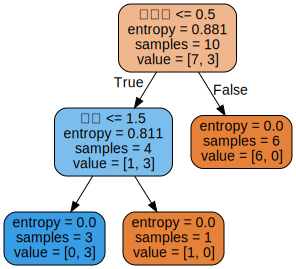

In [5]:

# Graphviz 用の dot データを作成する
dot_data = tree.export_graphviz(classifier, 
            out_file=None, # 出力ファイル名 None なら出力しない
            filled=True, # ノードを色づけする
            rounded=True, # ノードの角を丸く
            feature_names=items) 

# 画像の保存
graph = pdp.graph_from_dot_data(dot_data)
for node in graph.get_nodes():
    node.set_fontname("IPAGothic")
graph.write_png("判決予測.png")

# 画面表示用データの作成
Source(dot_data)


薬物は3種あるが、**tree.DecisionTreeClassifier** は2分木しかつくれないので、薬物の部分は 1.5 以下と 1.5 以上という分岐になっている。項目は 0,1,2 なので、0 or 1 と 2 つまり、（シンナーと大麻）か（覚醒剤）かという分岐を意味する。

# 全判定結果

In [6]:
df['判定結果']=classifier.predict(df[items])
df

,性別,年齢,薬物,犯罪歴,実判決,判定結果
0,0,0,0,0,猶予,猶予
1,1,0,0,0,猶予,猶予
2,0,2,1,0,猶予,猶予
3,0,0,0,1,実刑,実刑
4,0,2,1,1,実刑,実刑
5,1,1,2,1,実刑,実刑
6,1,1,0,1,実刑,実刑
7,1,0,2,1,実刑,実刑
8,0,2,2,0,実刑,実刑
9,1,0,2,1,実刑,実刑


In [7]:
print("正解率 {:3.2f}　％".format((df['実判決'] != df['判定結果']).value_counts()[False]*100/10))

正解率 100.00　％
